# **Análise de dados**

## **Professor**: Marcos Guimarães

## **Aluno**: 1831133118 -  Eduardo Quental Simão

# Análise de Dados sobre os dados sobre os preços de casas nos Estados  Unidos

In [1]:
# Importando as bibliotecas

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import datetime as dt
import matplotlib.pyplot as plt


### Preparação

In [2]:
#Importando as tabelas
hs=pd.read_csv('F:/posiesb/FSCD02/AED/kc_house_data.csv')
zc=pd.read_csv('F:/posiesb/FSCD02/AED/zipcodes.csv')


In [3]:
# Exibição dos dados numéricos
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Exibindo as duas primeiras linhas dos DataFrames 

In [5]:
hs.head(2).T

,0,1
id,7129300520,6414100192
date,20141013T000000,20141209T000000
price,"221,900.00","538,000.00"
bedrooms,3,3
bathrooms,1.00,2.25
sqft_living,1180,2570
sqft_lot,5650,7242
floors,1.00,2.00
waterfront,0,0
view,0,0


In [6]:
zc.head(2).T

,0,1
ZipCode,501,544
City,HOLTSVILLE,HOLTSVILLE
State,NY,NY
Latitude,40.82,40.79
Longitude,-73.05,-73.04
Classification,U,U
Population,0,0


### Avaliando o conjuto de dados

In [7]:
# Avaliando o conjuto de dados do DataFrame principal (hs)

hs.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,613.00","4,580,301,520.86","2,876,565,571.31","1,000,102.00","2,123,049,194.00","3,904,930,410.00","7,308,900,445.00","9,900,000,190.00"
price,"21,613.00","540,182.16","367,362.23","75,000.00","321,950.00","450,000.00","645,000.00","7,700,000.00"
bedrooms,"21,613.00",3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,"21,613.00",2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,"21,613.00","2,079.90",918.44,290.00,"1,427.00","1,910.00","2,550.00","13,540.00"
sqft_lot,"21,613.00","15,106.97","41,420.51",520.00,"5,040.00","7,618.00","10,688.00","1,651,359.00"
floors,"21,613.00",1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,"21,613.00",0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,"21,613.00",0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,"21,613.00",3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [8]:
# Avaliando o tipo dos dados na coluna
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
#Avaliando o DataFrame de dados do ZIPCODE (zc)

zc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41722 entries, 0 to 41721
Data columns (total 7 columns):
ZipCode           41722 non-null int64
City              41722 non-null object
State             41722 non-null object
Latitude          41722 non-null float64
Longitude         41722 non-null float64
Classification    11903 non-null object
Population        41722 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.2+ MB


In [10]:
zc.describe()

,ZipCode,Latitude,Longitude,Population
count,"41,722.00","41,722.00","41,722.00","41,722.00"
mean,"49,412.43",37.89,-89.53,"7,502.39"
std,"28,188.91",7.18,19.47,"12,844.02"
min,501.00,-14.27,-177.09,0.00
25%,"25,529.25",34.71,-97.15,134.00
50%,"48,623.50",39.02,-87.65,"1,435.50"
75%,"73,033.75",41.84,-79.76,"8,473.75"
max,"99,950.00",70.70,145.75,"113,916.00"


In [11]:
# avaliando as variáveis do tipo 'object'
zc.describe(include=['object']).T

,count,unique,top,freq
City,41722,18686,WASHINGTON,290
State,41722,62,TX,2598
Classification,11903,3,P,9207


### 1 - Tratamento de Dados

In [12]:
#Unindo os DataFrames

hs_novo=hs.merge(zc, left_on='zipcode', right_on='ZipCode')
hs_novo.head(2).T

,0,1
id,7129300520,4060000240
date,20141013T000000,20140623T000000
price,"221,900.00","205,425.00"
bedrooms,3,2
bathrooms,1.00,1.00
sqft_living,1180,880
sqft_lot,5650,6780
floors,1.00,1.00
waterfront,0,0
view,0,0


In [13]:
#Verificando a características das colunas
hs_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 28 columns):
id                21613 non-null int64
date              21613 non-null object
price             21613 non-null float64
bedrooms          21613 non-null int64
bathrooms         21613 non-null float64
sqft_living       21613 non-null int64
sqft_lot          21613 non-null int64
floors            21613 non-null float64
waterfront        21613 non-null int64
view              21613 non-null int64
condition         21613 non-null int64
grade             21613 non-null int64
sqft_above        21613 non-null int64
sqft_basement     21613 non-null int64
yr_built          21613 non-null int64
yr_renovated      21613 non-null int64
zipcode           21613 non-null int64
lat               21613 non-null float64
long              21613 non-null float64
sqft_living15     21613 non-null int64
sqft_lot15        21613 non-null int64
ZipCode           21613 non-null int64
City              2161

In [14]:
# Criando colunas para converter pés em metros quadrados
# Criando coluna price/m2
# Convertento a coluna date em data


hs_novo['m2_liv']= hs_novo['sqft_living']/10.7674
hs_novo['m2_casa']= hs_novo['sqft_lot']/10.7674
hs_novo['m2_porao'] = hs_novo['sqft_basement']/10.7674
hs_novo['m2_total'] = hs_novo['m2_casa'] + hs_novo['m2_porao']
hs_novo['preco_m2'] = hs_novo['price']/hs_novo['m2_total']

hs_novo.head(3).T

,0,1,2
id,7129300520,4060000240,4058801670
date,20141013T000000,20140623T000000,20140717T000000
price,"221,900.00","205,425.00","445,000.00"
bedrooms,3,2,3
bathrooms,1.00,1.00,2.25
sqft_living,1180,880,2100
sqft_lot,5650,6780,8201
floors,1.00,1.00,1.00
waterfront,0,0,0
view,0,0,2


In [15]:
# Criando a coluna idade da casa na data do anuncio
#(supondo que o campo date faz referência a data em 
# que a casa foi anunciada)

# Transformando date de objeto para data e depois obtendo o ano
# fonte:https://stackoverflow.com/questions/33822948/pandas-sklearn-linear-regression-fails

hs_novo['date']=pd.to_datetime(hs_novo['date'], format='%Y%m%dT')
hs_novo['ano_anuncio']=hs_novo['date'].dt.year
hs_novo['idade_casa']=hs_novo['ano_anuncio']- hs_novo['yr_built']

hs_novo.head(2).T



,0,1
id,7129300520,4060000240
date,2014-10-13 00:00:00,2014-06-23 00:00:00
price,"221,900.00","205,425.00"
bedrooms,3,2
bathrooms,1.00,1.00
sqft_living,1180,880
sqft_lot,5650,6780
floors,1.00,1.00
waterfront,0,0
view,0,0


In [16]:
hs_novo.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'ZipCode', 'City',
       'State', 'Latitude', 'Longitude', 'Classification', 'Population',
       'm2_liv', 'm2_casa', 'm2_porao', 'm2_total', 'preco_m2', 'ano_anuncio',
       'idade_casa'],
      dtype='object')

In [17]:
hs_novo=hs_novo[['id', 'date', 'ano_anuncio', 'idade_casa','price', 'preco_m2', 'm2_casa', 'm2_porao', 'm2_total',
                 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 
                 'yr_built', 'yr_renovated', 'zipcode', 'City','State', 
                 'Latitude', 'Longitude']]

hs_novo.head(3).T

,0,1,2
id,7129300520,4060000240,4058801670
date,2014-10-13 00:00:00,2014-06-23 00:00:00,2014-07-17 00:00:00
ano_anuncio,2014,2014,2014
idade_casa,59,69,47
price,"221,900.00","205,425.00","445,000.00"
preco_m2,422.88,326.24,551.95
m2_casa,524.73,629.68,761.65
m2_porao,0.00,0.00,44.58
m2_total,524.73,629.68,806.23
bedrooms,3,2,3


In [18]:
#Criando DataFrame para verificar a quantidades de informações únicas por coluna
#fonte:https://pbpython.com/pandas_dtypes_cat.html

unique_counts = pd.DataFrame.from_records([(col, hs_novo[col].nunique()) for col in hs_novo.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique']).reset_index()

unique_counts

,index,Column_Name,Num_Unique
0,19,State,1
1,2,ano_anuncio,2
2,12,waterfront,2
3,14,condition,5
4,13,view,5
5,11,floors,6
6,9,bedrooms,13
7,18,City,24
8,10,bathrooms,30
9,20,Latitude,69


In [19]:
hs_novo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,613.00","4,580,301,520.86","2,876,565,571.31","1,000,102.00","2,123,049,194.00","3,904,930,410.00","7,308,900,445.00","9,900,000,190.00"
ano_anuncio,"21,613.00","2,014.32",0.47,"2,014.00","2,014.00","2,014.00","2,015.00","2,015.00"
idade_casa,"21,613.00",43.32,29.38,-1.00,18.00,40.00,63.00,115.00
price,"21,613.00","540,182.16","367,362.23","75,000.00","321,950.00","450,000.00","645,000.00","7,700,000.00"
preco_m2,"21,613.00",896.91,903.47,1.76,350.12,616.00,"1,107.58","14,494.58"
m2_casa,"21,613.00","1,403.03","3,846.84",48.29,468.08,707.51,992.63,"153,366.55"
m2_porao,"21,613.00",27.07,41.10,0.00,0.00,0.00,52.01,447.65
m2_total,"21,613.00","1,430.10","3,847.69",48.29,495.29,734.72,"1,028.10","153,366.55"
bedrooms,"21,613.00",3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,"21,613.00",2.11,0.77,0.00,1.75,2.25,2.50,8.00


### Checando alguns dados estranhos

In [20]:
#Idade da casa -1
hs_novo[(hs_novo.idade_casa==-1)]

,id,date,ano_anuncio,idade_casa,price,preco_m2,m2_casa,m2_porao,m2_total,bedrooms,...,waterfront,view,condition,yr_built,yr_renovated,zipcode,City,State,Latitude,Longitude
5589,1257201420,2014-07-09,2014,-1,"595,000.00","1,158.52",423.50,90.09,513.59,4,...,0,0,3,2015,0,98103,SEATTLE,WA,47.67,-122.35
5604,5694500840,2014-11-25,2014,-1,"559,000.00","4,776.97",89.16,27.86,117.02,2,...,0,0,3,2015,0,98103,SEATTLE,WA,47.67,-122.35
6314,9310300160,2014-08-28,2014,-1,"357,000.00",416.01,858.15,0.00,858.15,5,...,0,0,3,2015,0,98133,SEATTLE,WA,47.74,-122.34
6358,1832100030,2014-06-25,2014,-1,"597,326.00",717.82,766.20,65.94,832.14,4,...,0,0,3,2015,0,98040,MERCER ISLAND,WA,47.57,-122.23
7399,6169901185,2014-05-20,2014,-1,"490,000.00","1,269.80",276.30,109.59,385.89,5,...,0,2,3,2015,0,98119,SEATTLE,WA,47.64,-122.37
13106,9126100346,2014-06-17,2014,-1,"350,000.00","1,046.83",334.34,0.00,334.34,3,...,0,0,3,2015,0,98122,SEATTLE,WA,47.61,-122.30
13142,9126100765,2014-08-01,2014,-1,"455,000.00","4,831.53",94.17,0.00,94.17,3,...,0,0,3,2015,0,98122,SEATTLE,WA,47.61,-122.30
13216,3076500830,2014-10-29,2014,-1,"385,195.00",691.26,557.24,0.00,557.24,1,...,0,0,3,2015,0,98144,SEATTLE,WA,47.58,-122.29
13294,1250200495,2014-06-24,2014,-1,"455,000.00","3,357.89",116.93,18.57,135.50,2,...,0,0,3,2015,0,98144,SEATTLE,WA,47.58,-122.29
13502,6058600220,2014-07-31,2014,-1,"230,000.00","1,763.89",117.39,13.00,130.39,3,...,0,0,3,2015,0,98144,SEATTLE,WA,47.58,-122.29


In [21]:
# Alterando idade -1 para 0
# fonte:https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
hs_novo.idade_casa.replace(to_replace = -1, value = 0, inplace=True)

In [22]:
#Eliminando casas sem banheiros
hs_novo=hs_novo[(hs_novo.bathrooms!=0)]

In [23]:
#Eliminando casas sem quartos e casa com 33 quartos
hs_novo=hs_novo[(hs_novo.bedrooms!=0)]
hs_novo=hs_novo[(hs_novo.bedrooms!=33)]

### Visualização de Dados

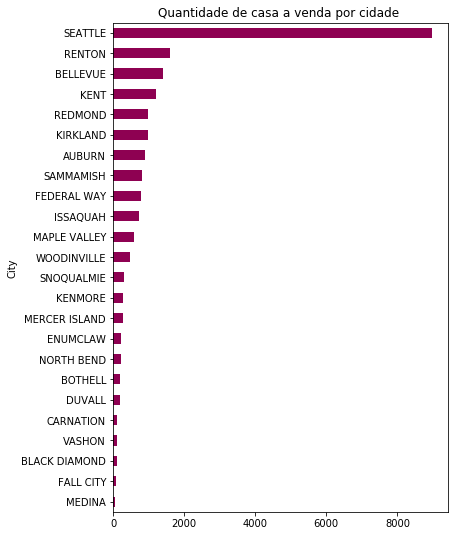

In [24]:
# Quantidade de casas por cidade
hs_novo.groupby('City').id.count().sort_values().to_frame().plot(kind='barh',
                                                              title = 'Quantidade de casa a venda por cidade ',
                                                              colormap = 'PiYG', figsize=(6,9), legend=False
                                                             )

In [25]:
hs_novo.groupby('City').id.count().sort_values().to_frame().T

City,MEDINA,FALL CITY,BLACK DIAMOND,VASHON,CARNATION,DUVALL,BOTHELL,NORTH BEND,ENUMCLAW,MERCER ISLAND,...,ISSAQUAH,FEDERAL WAY,SAMMAMISH,AUBURN,KIRKLAND,REDMOND,KENT,BELLEVUE,RENTON,SEATTLE
id,50,80,100,117,124,190,195,220,233,282,...,733,779,800,911,977,977,1201,1407,1597,8972


In [26]:
hs_novo.head(2).T

,0,1
id,7129300520,4060000240
date,2014-10-13 00:00:00,2014-06-23 00:00:00
ano_anuncio,2014,2014
idade_casa,59,69
price,"221,900.00","205,425.00"
preco_m2,422.88,326.24
m2_casa,524.73,629.68
m2_porao,0.00,0.00
m2_total,524.73,629.68
bedrooms,3,2


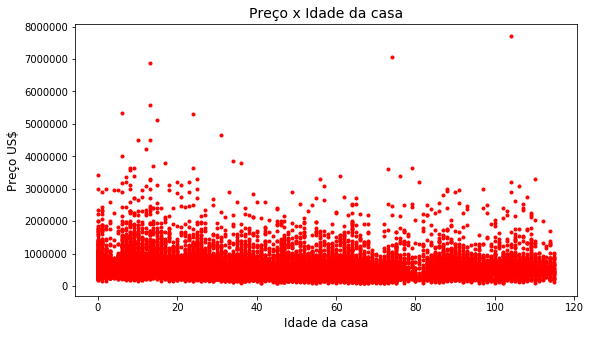

In [27]:

plt.figure(figsize=(9,5))
plt.xlabel('Idade da casa', fontsize=12)
plt.ylabel('Preço US$', fontsize=12)
plt.title('Preço x Idade da casa', fontsize=14)
plt.scatter(x='idade_casa', y='price', color='r', marker='.', data=hs_novo)

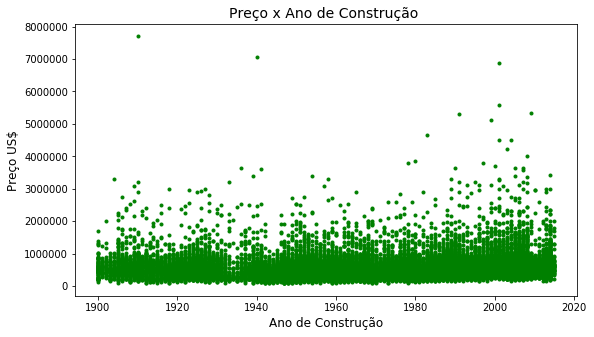

In [28]:
plt.figure(figsize=(9,5))
plt.xlabel('Ano de Construção', fontsize=12)
plt.ylabel('Preço US$', fontsize=12)
plt.title('Preço x Ano de Construção ', fontsize=14)
plt.scatter(x='yr_built', y='price', color='g', marker='.', data=hs_novo)

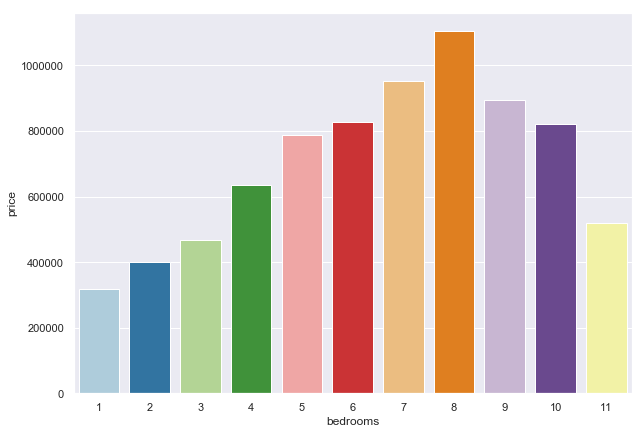

In [29]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_palette('Paired')
sns.barplot(x='bedrooms', y='price', data=hs_novo, ci=None)

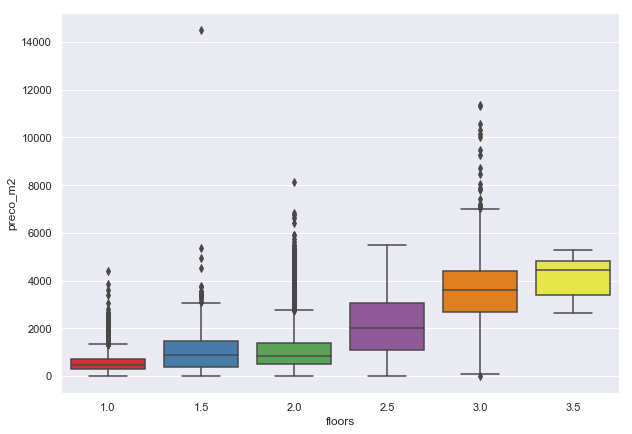

In [30]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_palette('Set1')
sns.boxplot(x='floors', y='preco_m2', data=hs_novo)

In [31]:
hs_novo.head(3).T

,0,1,2
id,7129300520,4060000240,4058801670
date,2014-10-13 00:00:00,2014-06-23 00:00:00,2014-07-17 00:00:00
ano_anuncio,2014,2014,2014
idade_casa,59,69,47
price,"221,900.00","205,425.00","445,000.00"
preco_m2,422.88,326.24,551.95
m2_casa,524.73,629.68,761.65
m2_porao,0.00,0.00,44.58
m2_total,524.73,629.68,806.23
bedrooms,3,2,3


In [37]:
# Localizando as casas centenárias
cent=hs_novo[(hs_novo.idade_casa>=100)]
cent.head(3).T

,18,37,40
id,7567600045,7129300400,179003055
date,2014-08-27 00:00:00,2014-08-14 00:00:00,2014-11-13 00:00:00
ano_anuncio,2014,2014,2014
idade_casa,106,109,109
price,"825,000.00","400,000.00","210,000.00"
preco_m2,695.35,623.84,301.49
m2_casa,"1,186.45",608.69,696.55
m2_porao,0.00,32.51,0.00
m2_total,"1,186.45",641.19,696.55
bedrooms,2,6,3


In [39]:
cent.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"1,075.00","4,598,320,722.06","2,982,381,664.09","7,600,057.00","1,962,450,905.00","3,797,000,330.00","7,433,850,262.50","9,839,301,165.00"
ano_anuncio,"1,075.00","2,014.33",0.47,"2,014.00","2,014.00","2,014.00","2,015.00","2,015.00"
idade_casa,"1,075.00",106.52,4.12,100.00,103.00,106.00,109.00,115.00
price,"1,075.00","631,740.63","444,813.65","80,000.00","400,000.00","550,000.00","737,000.00","7,700,000.00"
preco_m2,"1,075.00","1,388.10",894.96,1.76,821.31,"1,292.09","1,826.64","14,494.58"
m2_casa,"1,075.00",732.91,"3,659.38",48.29,337.36,441.15,551.90,"108,177.83"
m2_porao,"1,075.00",28.47,39.55,0.00,0.00,0.00,61.30,323.20
m2_total,"1,075.00",761.38,"3,658.42",48.29,365.92,464.36,580.46,"108,177.83"
bedrooms,"1,075.00",3.23,1.16,1.00,2.00,3.00,4.00,10.00
bathrooms,"1,075.00",1.75,0.78,0.50,1.00,1.75,2.00,8.00


In [71]:
cent.groupby('City').agg({'price':[min, max], 'idade_casa': [min, max],
                          'preco_m2':[min, max]}).sort_values(by='City')

price              idade_casa      preco_m2          
                       min          max        min  max      min       max
City                                                                      
AUBURN           95,000.00   279,950.00        100  114    66.78    489.29
BELLEVUE        428,750.00 1,750,000.00        101  106   150.20    841.25
BLACK DIAMOND   135,000.00   214,000.00        100  115   199.12    466.35
BOTHELL         375,000.00   465,000.00        100  101   672.96    680.83
CARNATION        80,000.00   230,950.00        100  105     1.76    531.72
DUVALL          170,000.00   390,000.00        101  112   326.87    596.49
ENUMCLAW        152,900.00   474,000.00        100  115    12.65    569.14
FALL CITY       439,900.00   600,000.00        102  111    62.82    771.87
ISSAQUAH        130,000.00   385,000.00        101  115    77.74    933.17
KENT            100,000.00   550,000.00        102  114    19.44    355.82
KIRKLAND        257,000.00 2,350,000.00        100  114   253.41  1,282.28
MEDINA        1,160,000.00 1,160,000.00        113  113   809.05    809.05
NORTH BEND      399,500.00   399,500.00        103  103   339.35    339.35
RENTON          180,000.00   500,000.00        100  114    32.45    710.65
SAMMAMISH       572,000.00   572,000.00        107  107   270.52    270.52
SEATTLE          90,000.00 7,700,000.00        100  115   183.77 14,494.58
SNOQUALMIE      190,000.00   550,000.00        103  114    22.58    448.24
VASHON          300,000.00   665,000.00        101  111    34.20    397.05
WOODINVILLE     203,700.00   450,000.00        101  115    71.51    877.33

### 3 - Algumas descobertas

In [97]:
# 1 - Existem 1075 casas com mais de 100 anos de construção
# 2 - Existem 26 casas com 115 anos
cent.groupby('idade_casa').id.count().to_frame().sort_values(by='idade_casa', 
                                                             ascending=False).reset_index().head(1)

,idade_casa,id
0,115,26


In [98]:
# 3 - Medina tem o maior preço por metro quadrado nas suas casas
hs_novo.groupby('City').preco_m2.mean().to_frame().reset_index().head(1)

,City,preco_m2
0,AUBURN,360.05


In [100]:
# a menor casa tem 176,27 m2
hs_novo.groupby('City').m2_casa.min().to_frame().reset_index().head(1)

,City,m2_casa
0,AUBURN,176.27
